# Modèle de mélange

## Densité de mélange 

Considérons un mélange de $K$ lois gaussiennes dont la densité est donnée par
$$f_\theta(x)=\sum_{k=1}^K\pi_kf_{\mathcal N(\mu_k,\sigma^2_k)}(x),$$
où $0<\pi_k<1$, $\sum_{k=1}^K\pi_k=1$, $\mu_k\in\mathbb R$ et $\sigma_k>0$, $k=1,\dots,K$. 

Pour gérer les  paramètres d'un mélange gaussien sous **R** nous allons travailler avec des  listes. Exemple :
Les paramètres du mélange suivant :
$$f_\theta(x)= 0.2*f_{\mathcal N(2,4)}(x)+0.2*f_{\mathcal N(-5,1)}(x)+0.6*f_{\mathcal N(2,0.01)}(x)$$
sont stocké dans la liste suivante :



In [1]:
theta = list(pi=c(.2,.2,.6), mu=c(2,-5,2), sig=c(2,1,.1))
theta

$pi
[1] 0.2 0.2 0.6

$mu
[1]  2 -5  2

$sig
[1] 2.0 1.0 0.1

Remarquons que les trois vecteurs dans la liste **theta** ont la même longueur et que les $\pi_k$ et les $\sigma_k$ vérifient les conditions precisées ci-dessus.

### Question 1
Ecrire une fonction **drnormmix** qui prend en argument un vecteur **x** et une liste de paramètres **theta** d'un mélange gaussien. Cette fonction  évalue la densité du mélange gaussien associé aux paramètres **theta** en les éléments de **x**.

In [2]:
dnormmix <- function(x, theta){
    
    return(dens)
}

In [3]:
dnormmix <- function(x, theta){
    dens <- rep(0, length(x))
    K <- length(theta$pi)
    for (k in 1:K){
        dens <- dens + theta$pi[k]*dnorm(x, theta$mu[k], theta$sig[k])
    }                                         
    return(dens)
}

### Question 2

En changeant les paramètres d'un mélange gaussien, essayez de reproduire les six graphiques suivants, qui sont tous des mélanges gaussiens.

![image](melanges.png)

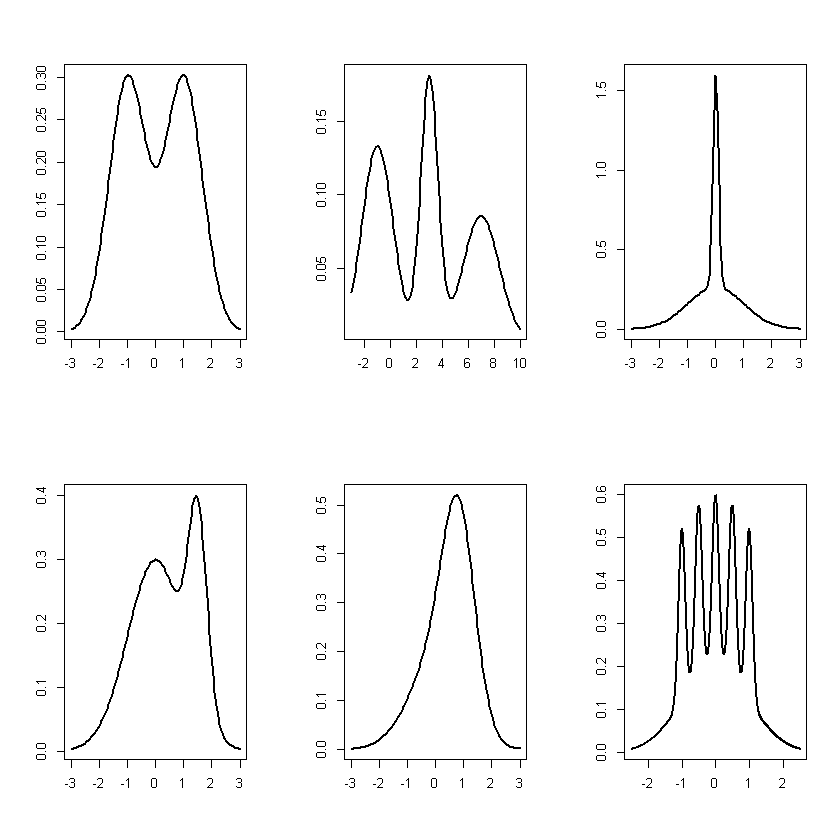

In [4]:
par(mfrow=c(2,3))
# bimodal symétrique, proche
theta <- list(pi=c(.5,.5), mu = c(-1,1), sig= c(2/3,2/3))
curve(dnormmix(x,theta),-3,3,lwd=2,ylab='',xlab='')

# trimodal, séparé
theta <- list(pi=c(.4,.3,.3), mu = c(-1,3,7), sig= c(1.2,2/3,1.4))
curve(dnormmix(x,theta),-3,10,lwd=2,ylab='',xlab='')

# pique, coin
theta <- list(pi=c(2/3,1/3), mu = c(0,0), sig= c(1,1/10))
curve(dnormmix(x,theta),-3,3,lwd=2,ylab='',xlab='')

# bimodal, proche, asymétrique
theta <- list(pi=c(3/4,1/4), mu = c(0,3/2), sig= c(1,1/3))
curve(dnormmix(x,theta),-3,3,lwd=2,ylab='',xlab='')

# asymétrique
theta <- list(pi=c(.4,.15,.45), mu = c(0,1/2,13/15), sig= c(1,2/3,5/9))
curve(dnormmix(x,theta),-3,3,lwd=2,ylab='',xlab='')

# peigne
theta <- list( pi=c(1/2,rep(1/10,5)), mu = c(0,(0:4)/2-1), sig= c(1,rep(1/10,5)) )
x <- seq(-2.5,2.5,by=.01)
plot(x,dnormmix(x,theta),lwd=2,ylab='',xlab='',type='l')

### Question 3
- Considérons les mélanges de loi uniforme $U[0,\lambda]$ dont la densité est donnée par 
$$f_\theta(x)=\sum_{k=1}^K\pi_kf_{U[0,\lambda_k]}(x),$$
où $0<\pi_k<1$, $\sum_{k=1}^K\pi_k=1$ et $\lambda_k>0$, $k=1,\dots,K$. Ecrire une fonction **dunifmix** pour évaluer la densité du mélange. Quelles formes de densité peut-on obtenir avec un mélange uniforme ?
- Mêmes questions pour les mélanges de loi Gamma $\Gamma(\alpha,\beta)$ dont la densité est donnée par 
$$f_\theta(x)=\sum_{k=1}^K\pi_kf_{\Gamma(\alpha_k,\beta_k)}(x),$$
où $0<\pi_k<1$, $\sum_{k=1}^K\pi_k=1$ et $\alpha_k>0, \beta_k>0$ pour $k=1,\dots,K$.  Comparer aux formes des mélanges gaussiens.

In [5]:
dunifmix <- function(x, theta){
    # theta : $pi - poids de composant
    #         $lambda - paramètres uniformes
    dens <- rep(0, length(x))
    K <- length(theta$pi)
    for (k in 1:K){
        dens <- dens + theta$pi[k]*dunif(x, 0, theta$lambda[k])
    }                                         
    return(dens)
}

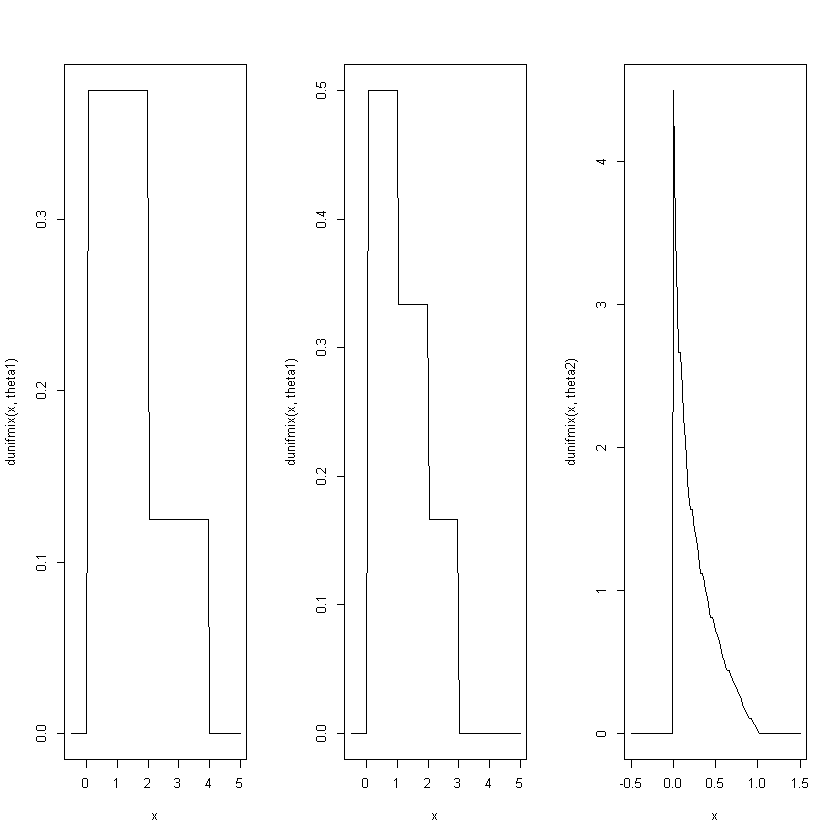

In [6]:
par(mfrow=c(1,3))
theta1 = list(pi=c(1,1)/2, lambda=c(2,4))
curve(dunifmix(x,theta1),-.5,5)
theta1 = list(pi=c(1,2,3)/6, lambda=c(1,2,3))
curve(dunifmix(x,theta1),-.5,5)
theta2 = list(pi=rep(1/50,50), lambda=(1:50)/50)
curve(dunifmix(x,theta2),-.5,1.5)

In [7]:
dgammamix <- function(x, theta){
    # theta : $pi - poids de composant
    #         $alpha, $beta - paramètres de la loi Gamma
    dens <- rep(0, length(x))
    K <- length(theta$pi)
    for (k in 1:K){
        dens <- dens + theta$pi[k]*dgamma(x, theta$alpha[k], theta$beta[k])
    }                                         
    return(dens)
}

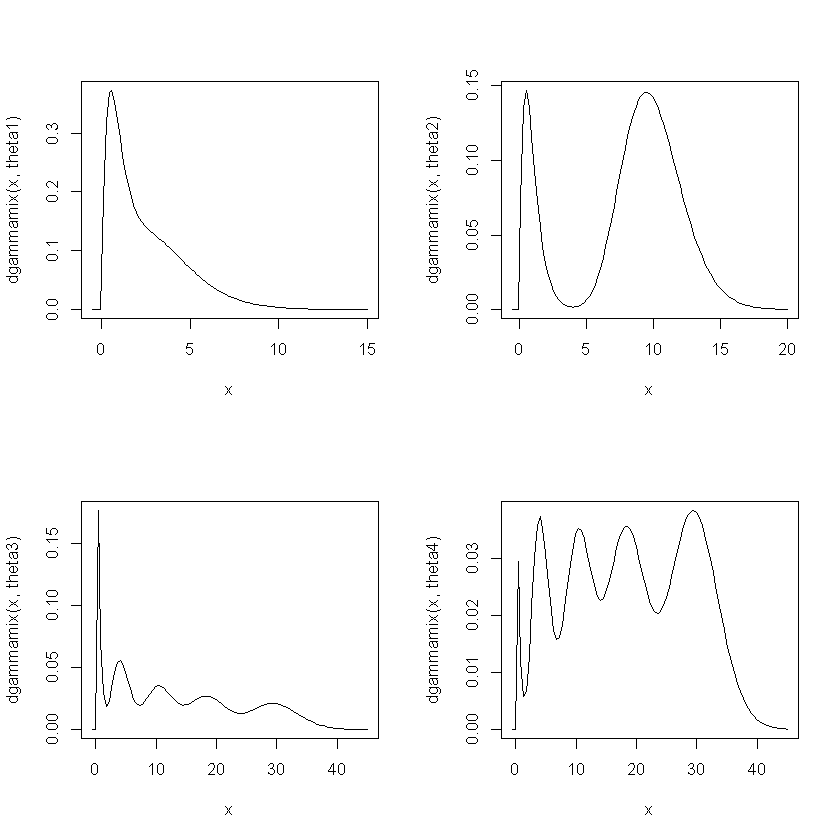

In [8]:
par(mfrow=c(2,2))
theta1 = list(pi=c(1,1)/2,alpha=c(2,4),beta=c(2,1))
curve(dgammamix(x, theta1),-.5,15)

theta2 = list(pi=c(1,4)/5,alpha=c(2,20),beta=c(2,2))
curve(dgammamix(x, theta2),-.5,20)

theta3 = list(pi=rep(1/5,5),alpha= c(1,9,22,38,60) ,beta=rep(2,5))
curve(dgammamix(x, theta3),-.5,45)

theta4 = list(pi=c(1,4,6,8,11)/30,alpha= c(1,9,22,38,60) ,beta=rep(2,5))
curve(dgammamix(x, theta4),-.5,45)



## Simulation de données

### Question 4
- Ecrire une fonction **rnormmix** pour générer des réalisations d'un mélange gaussien d'ordre $K$. Les arguments de la fonction sont la taille d'échantillon **n** et une liste **theta** avec les paramètres du mélange. Ne pas utiliser de boucle **for** sur **n** !
- Tester votre fonction en générant un grand échantillon d'un mélange gaussien dont on compare l'histogramme à sa densité par un graphique.

In [9]:
rnormmix <- function(n, theta){

    return(obs)
}

In [10]:
rnormmix <- function(n, theta){
  K <- length(theta$pi)
  etiqu <- sample(1:K, size=n, replace=TRUE, prob=theta$pi)
  obs <- rep(NA,n)
  i <- 1
  for (k in 1:K){
    n.group <- sum(etiqu==k)
    if(n.group>0){
      obs[i:(i+n.group-1)] <- rnorm(n.group, theta$mu[k], theta$sig[k])
      i <- i + n.group
    }
  }        
  return(obs)
}

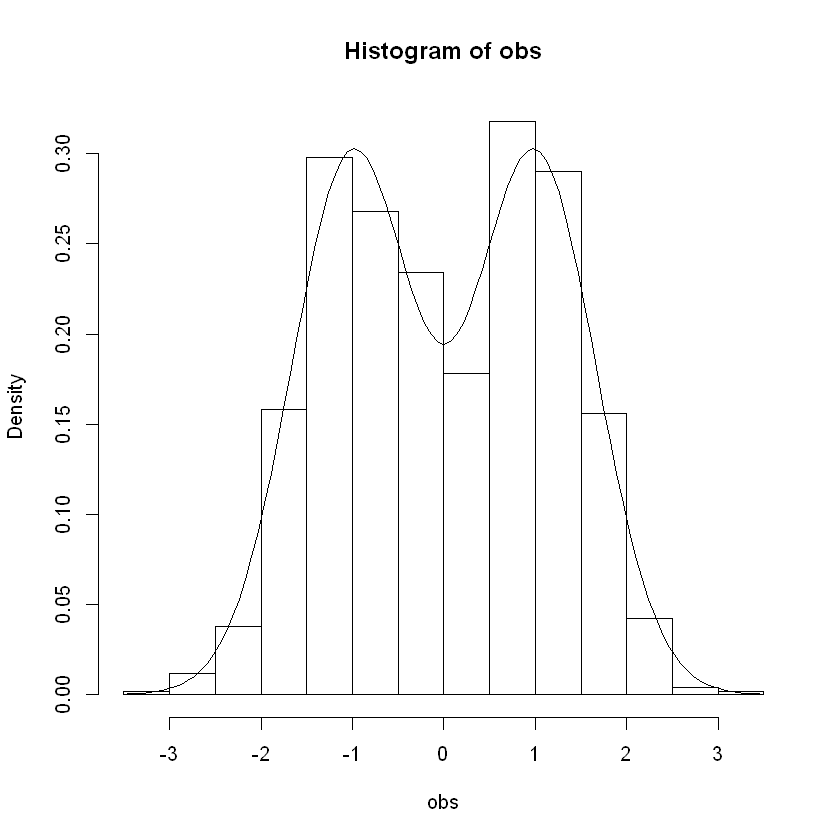

In [11]:
theta <- list(pi=c(.5,.5), mu = c(-1,1), sig= c(2/3,2/3))
obs <- rnormmix(1000, theta)
hist(obs, freq=F)
curve(dnormmix(x,theta), add=T)

## Fonction de log-vraisemblance

Dans l'optique du calcul de l'estimateur du maximum de vraisemblance, considérons la fonction de log-vraisemblance d'un modèle de mélange  défini par
$$\ell(\theta)=\sum_{i=1}^n\log f_\theta(x_i),$$
où $f_\theta$ est la densité du mélange et  $(x_1,\dots,x_n)$ un échantillon du mélange $f_\theta$.

### Question 5
Ecrire une fonction **lvraisnorm** qui prend en argument un échantillon observé **obs** et une liste  **param** de paramètres d'un mélange gaussien. La fonction renvoie la valeur de la log-vraisemblance du mélange gaussien associé.

In [12]:
lvraisnorm <- function(param, obs){
    
    return(logvrais)
}

In [13]:
lvraisnorm <- function(param, obs){    
    logvrais <- sum(log(dnormmix(obs, param)))
    return(logvrais)
}

In [14]:
lvraisnorm(theta, obs)

[1] -1507.498

L'EMV est définit comme le point $\hat\theta$ où la log-vraisemblance $\ell(\theta)$ atteint son maximum. Dans des modèles de mélange, $\theta$ n'est jamais un scalaire, ce qui rend la visualisation de $\ell(\theta)$ compliquée. 

Dans la question suivante nous allons considérer le mélange gaussien d'ordre 2 de densité
$$f_\theta(x) = p f_{\mathcal N(0,1)}(x) + (1-p) f_{\mathcal N(2.5,1)}(x).$$
Afin de faciliter la visualisation de la log-vraisemblance, nous supposons que les écarts-types  $\sigma_1=\sigma_2=1$ ainsi que les proportions $p$ et $1-p$ sont **connus**, et seulement les  moyennes $\mu_1$ et $\mu_2$ sont inconnus et à estimer à partir des données.
Dans ce cas, notons la fonction de log-vraisemblance  par
$$\ell(\mu_1,\mu_2)=
\sum_{i=1}^n\log\left\{ p f_{\mathcal N(\mu_1,1)}(x_i) + (1-p) f_{\mathcal N(\mu_2,1)}(x_i)\right\}.$$

Nous allons utiliser la fonction **image** pour la représentation graphique de $\ell(\mu_1,\mu_2)$. La syntaxe est la suivante :

où **x** et **y** sont les grilles de l'abscisse et de l'ordonnée (des vecteurs de valeurs strictement croissantes de longueur **r** et **s**, resp.) et **z** est une matrice de taille **r**$\times$**s** contenant les valeurs de la fonction à tracer. Pour les autres options consulter les pages d'aide de **R**. 

Exemple : Illustration de la fonction $(x,y)\mapsto y^x$ :

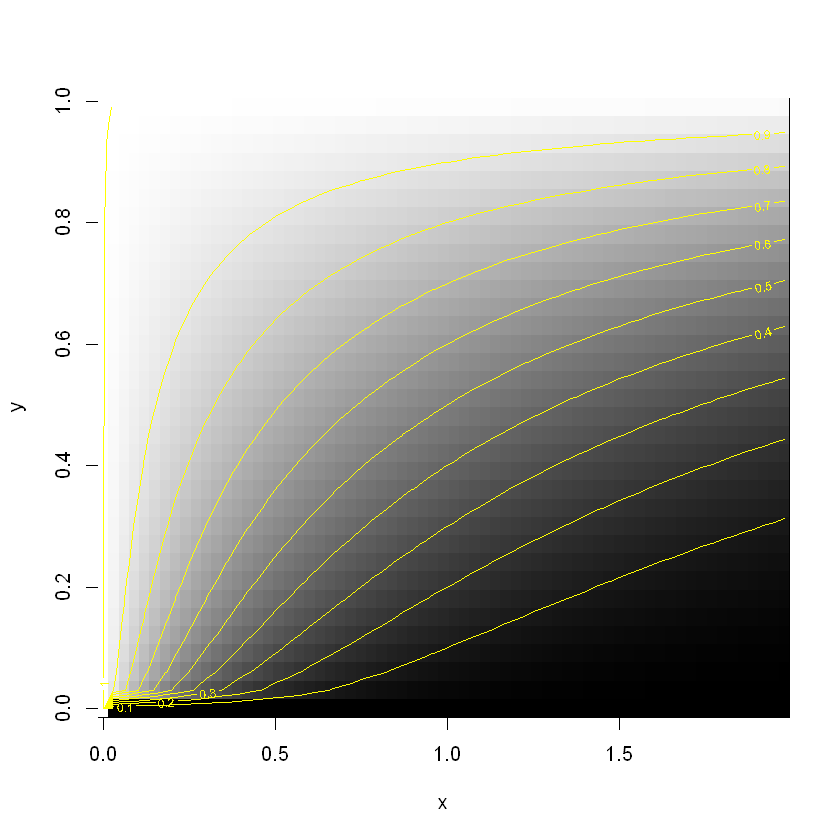

In [15]:
x <- seq(0, 2, by=.03)
y <- seq(0, 1, by=.03)
M <- matrix(NA, nrow=length(x), ncol=length(y))
for (k in 1:length(x))
  M[k,] <- y^x[k]
image(x, y, M, col=grey(0:255/255))
contour(x,y,M,add=T,nlevels=10,col='yellow')

On peut ajouter des lignes de niveau par la fonction **contour** en ajoutant aux instructions ci-dessus la commande :

In [16]:
#contour(x, y, M, add=T, nlevels=10, col='yellow')

### Question 6
- Utiliser la fonction **image** pour visualiser la fonction de log-vraisemblance 
$\ell(\mu_1,\mu_2)$ pour un échnatillon simulé de taille 1000 du mélange gaussien donné ci-dessus avec $p=0.5$. Constater que la log-vraisemblance n'est pas concave. Combien de maxima locaux admet-elle ? Commenter.
- Même question lorsque $p=0.7$. 
- Supposons que l'on applique la méthode de Newton-Raphson pour maximiser la fonction $(\mu_1,\mu_2)\mapsto \ell(\mu_1,\mu_2)$. Va-t-elle toujours converger vers l'EMV quand $p=0.5$ ? Et  quand $p=0.7$ ? 

In [17]:
theta <- list(pi=c(1,1)/2, mu=c(0,2.5), sig=c(1,1))
obs <- rnormmix(1000, theta)
mu1 <- seq(-1, 4, by=.02)
mu2 <- seq(-2, 4, by=.02)
L <- matrix(NA, nrow=length(mu1), ncol=length(mu2))
param <- theta
for (k in 1:length(mu1))
    for (l in 1:length(mu2)){
        param$mu <- c(mu1[k], mu2[l]) 
        L[k,l] <- lvraisnorm(param, obs)
    }


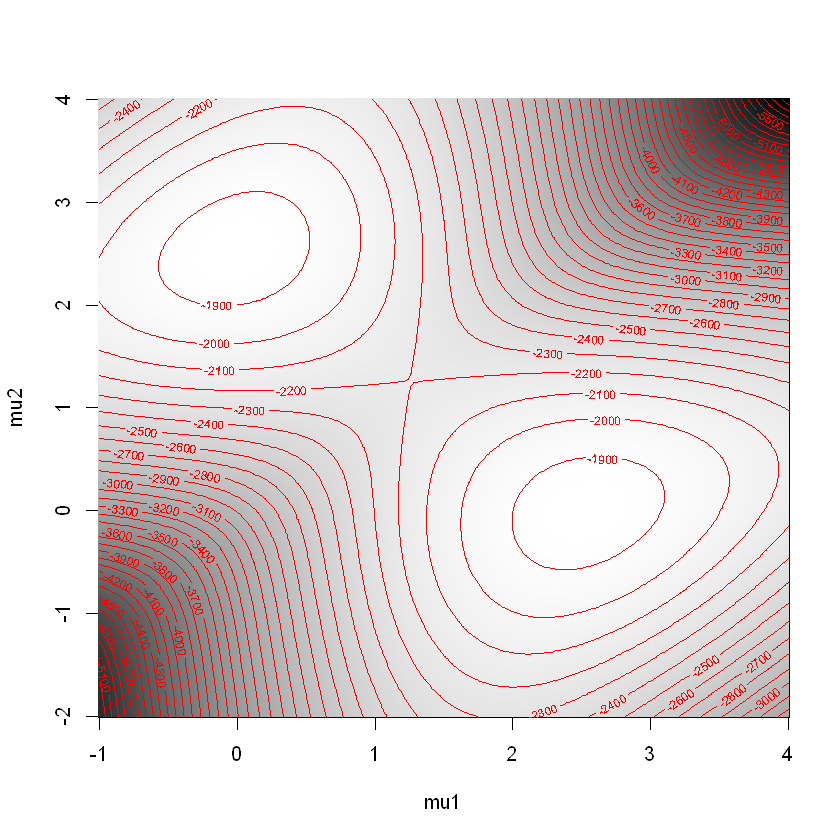

In [18]:
image(mu1, mu2, L, col=grey(0:255/255))
contour(mu1, mu2, L, add=T, nlevels=50, col='red')

In [19]:
theta <- list(pi=c(3,7)/10, mu=c(0,2.5), sig=c(1,1))
obs <- rnormmix(1000, theta)
mu1 <- seq(-1, 4, by=.02)
mu2 <- seq(-2, 4, by=.02)
L <- matrix(NA, nrow=length(mu1), ncol=length(mu2))
param <- theta
for (k in 1:length(mu1))
    for (l in 1:length(mu2)){
        param$mu <- c(mu1[k], mu2[l]) 
        L[k,l] <- lvraisnorm(param, obs)
    }

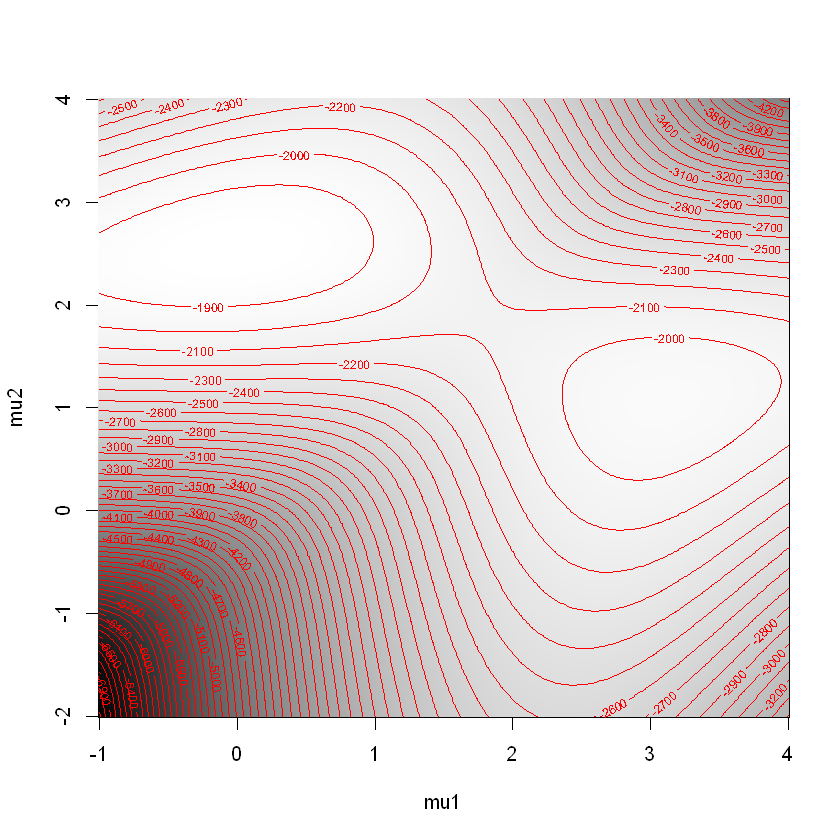

In [20]:
image(mu1, mu2, L, col=grey(0:255/255))
contour(mu1, mu2, L, add=T, nlevels=50, col='red')

On a à chaque fois 2 maxima locaux, le premier modèle n'est pas identifiable contrairement au second  

converge vers (3,1)  qui n'est pas l'EMV